<a href="https://colab.research.google.com/github/gbullido/Analisis-sobre-Dataset-Meteorite-Landings/blob/main/Analisis_sobre_Dataset_de_meteoritos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPROCESAMIENTO Y ANALISIS DE DATASET DE METEORITOS DATADOS A LO LARGO DE LA HISTORIA**

>[PREPROCESAMIENTO Y ANALISIS DE DATASET DE METEORITOS DATADOS A LO LARGO DE LA HISTORIA](#scrollTo=CBcYQ_fBgKVB)

>>[IMPORTANCION DE LIBRERIAS DE PREPOCESAMIENTO Y ANALISIS](#scrollTo=Tp19p0-cheey)

>>[IMPORTACION DE DATASET](#scrollTo=kIUIMFGAhnT3)

>>[PREPROCESAMIENTO](#scrollTo=qr2WHPVIlwm5)

>>>[Limpieza de datos Nulos o vacios](#scrollTo=--dacJwwRoaw)

>>>[Deteccion de datos anomalos y arreglos de formato](#scrollTo=XZW9C-b3Lh5x)

>>>>[Fecha](#scrollTo=ygRIvtlKSm6M)

>>>>>[Cambiar fecha completa por año](#scrollTo=7pSvnyResF0n)

>>>>>[Veamos datos anomalos](#scrollTo=eBvdNCWLsQYP)

>>[BIBLIOGRAFIA](#scrollTo=zY5HyxoJg156)



## ***IMPORTANCION DE LIBRERIAS DE PREPOCESAMIENTO Y ANALISIS***

Aqui importaremos las librerias principales.

In [380]:
!pip install basemap                     #Para poder importar Basemap
!pip install wget                        #Para poder importar wget

In [381]:
import numpy as np                       # Libreria para crear vectores y matrices grandes multidimensionales, funciones matemáticas de alto nivel etc.
import pandas as pd                      # Permite el procesado de datos que no son homogeneos (datos que no son del mismo tipo).
import matplotlib.pyplot as plt          # Biblioteca para creacionde graficas.
from mpl_toolkits.basemap import Basemap # Biblioteca para dibujar sobre mapas.
import seaborn as sns                    # Biblioteca especializada en graficos estadisticos.
from ipywidgets import *                 # Biblioteca para crear garficos dinamicos.
import wget                              #Descargador de red de URL
from google.colab import data_table      #Para poder tener tablas interactivas, las que poder filtrar directamente
from datetime import datetime                          #Para poder trandormar objetivos de tipo fecha
plt.rcParams['figure.figsize']=(9,7)     #Especificamos el tamaño de todas las graficas creadas con matplotlib

## ***IMPORTACION DE DATASET***

Ahora importaremos el dataset  [Meteorite Landings](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh).

In [382]:
import wget

url = "https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD"

wget.download(url, '/content/')

'/content//Meteorite_Landings (1).csv'

 Y mediante la libreria pandas lo leeremos y crearemos un dataframe llamado df_Meteoritos.

 
Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL. Con estas estructuras son las que haremos el preprocesamiento de datos.

In [383]:
df_Meteoritos = pd.read_csv('/content/Meteorite_Landings.csv')
df_Meteoritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [384]:
print("df_Meteoritos ocupa:",(df_Meteoritos.memory_usage(deep = True).sum()/1024)/1024,"MB")

df_Meteoritos ocupa: 19.06682300567627 MB


Podemos ver que el Dataset contiene: 


*   45716 entradas, es decir, filas.
*   10 columnas
*   Ocupa 19.06 MB en memoria.

Ademas *.info()* nos dice cuantas filas **no** nulas o **no** vacias hay en cada columna. Podemos ver que *mass (g)*, *reclat*, *reclong* y *GeoLocation* tiene menos filas "llenas" que el total de filas, por lo que podriamos eliminar esas filas ya que seguiriamos teniendo suficientes datos.

Pero primero veamos como luce nuestro dataframe, imprimiendo solo 10 filas.
Es una tabla interactiva por lo que si clickas en Filter arriba a la derecha de la tabla puedes buscar datos de manera mas especifica, aunque esta forma solo deja imprimir maximo 20.000 filas, pero para ver el dataset nos sirve.



In [385]:
data_table.DataTable(df_Meteoritos, include_index=False,max_rows=1000, num_rows_per_page=10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


Algunas columnas son auto explicativas pero otras no, por lo que agregare una descripcion de ellas:


*   nametype: 

    * 'Valid': Meteorito tipico
    * 'Relict': Meteorito que ha sido muy degradado por el clima de la tierra

*   reclass: Clase del meteorito; una de una gran cantidad de clases basadas en características físicas, químicas y otras. Sacado de de https://en.wikipedia.org/wiki/Meteorite_classification

*   Fall:

    * Fell: Se observo la caida del meteorito antes de encontrarlo.
    * Found: No se observo pero se encontro.

*   reclat: latitud de descubrimiento del meteorito
*   reclong: longitud de descubrimiento del meteorito
*   GeoLocation: Tupla que combina reclat y reclong



## ***PREPROCESAMIENTO***

Ahora en un primer lugar vamos a renombrar el nombre de las columnas para un mejor entendimiento.

In [386]:
df_Meteoritos = df_Meteoritos.rename({'name':'Nombre', 'id': 'ID', 'nametype': 'Estado del meteorito', 'recclass':'Clase del meteorito', 'mass (g)':'Masa(g)', 'fall':'Observado', 'year':'Fecha', 'reclat':'latitud', 'reclong':'longitud', 'GeoLocation':'Coordenadas' }, axis=1)

In [387]:
data_table.DataTable(df_Meteoritos, include_index=False, max_rows=10, num_rows_per_page=10)

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Fecha,latitud,longitud,Coordenadas
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


### ***Limpieza de datos Nulos o vacios***

Antes de empezar a detectar valores anomalos, como por ejemplo, masas negativas o fechas más adelante de la actualidad. Tenemos que discernir que hacer con los valores nulos.

Para ello veremos que columnas contienen nulos:

In [388]:
df_Meteoritos.isnull().sum()

Nombre                     0
ID                         0
Estado del meteorito       0
Clase del meteorito        0
Masa(g)                  131
Observado                  0
Fecha                    291
latitud                 7315
longitud                7315
Coordenadas             7315
dtype: int64

Vemos que hay nulos 7315 meteoritos sin coordenas registradas, 131 sin masa datada y 291 sin fecha. En un dataset sobre informacion de meteoritos impactados, que no tengan los mas esencial, masa, fecha, y coordenadas, es absurdo, porlo que vamos a quitar estas filas en su totalidad. Ademas son pocas respecto al total de filas.

Veamos el porcentaje de datos que perdemos:

In [389]:
((131+291+7315)/df_Meteoritos.shape[0])*100 #Devuelve la dimensionalidad de la columana 0 del DataFrame, en este caso, devuelve el total de filas

16.9240528480182

Eliminariamos un 17% de los datos, algo asumible y que nos ahorra tiempo y problemas en el preprocesado y analisis de los datos más adelante.

In [390]:
df_Meteoritos = df_Meteoritos.dropna() #Dropeamos todas las filas con valores nulos.
df_Meteoritos.shape #Devuelve la dimensionalidad total del DataFrame, 38115 filas y 10 columnas.

(38115, 10)

Vamos a volver a ejecutar la primera instruccion de esta seccion:

In [391]:
df_Meteoritos.isnull().sum()

Nombre                  0
ID                      0
Estado del meteorito    0
Clase del meteorito     0
Masa(g)                 0
Observado               0
Fecha                   0
latitud                 0
longitud                0
Coordenadas             0
dtype: int64

Como vemos no hay nulos, por lo que todo ha salido bien. 

In [392]:
print("df_Meteoritos ocupa:",(df_Meteoritos.memory_usage(deep = True).sum()/1024)/1024,"MB")

df_Meteoritos ocupa: 16.429685592651367 MB


Recalcar que logicamente el uso de memoria a bajado, antes era 19.06MB y ahora 16.42MB. Logico por el borrado.

### ***Deteccion de datos anomalos y arreglos de formato***

Vamos a ver si nuestras variables continuas tienen valores anómalos, los siguientes diagramas de caja y bigote nos dan pistas de si existen pocos valores que produzcan una desviación muy grande de los datos:

Las variables continuas son las que pueden tomar infinitos valores en un rango determinado o no. En este caso son, *Masa(g)*, *Fecha*, *latitud*, *longitud*, *Coordenadas*.

#### **Fecha**

##### **Cambiar fecha completa por año**

In [393]:
df_Meteoritos['Fecha']

0        01/01/1880 12:00:00 AM
1        01/01/1951 12:00:00 AM
2        01/01/1952 12:00:00 AM
3        01/01/1976 12:00:00 AM
4        01/01/1902 12:00:00 AM
                  ...          
45711    01/01/1990 12:00:00 AM
45712    01/01/1999 12:00:00 AM
45713    01/01/1939 12:00:00 AM
45714    01/01/2003 12:00:00 AM
45715    01/01/1976 12:00:00 AM
Name: Fecha, Length: 38115, dtype: object

En un primer lugar debemos pensar si merece la pena mantener el formato *mes/mes/año hora:minuto:segundo* para un evento tan caotico y aleatorio como es  la caida de un meteorito. No aporta nada de informacion el mantener este formato, y es totalmente remplazable por el valor unicamente del año.
Pero tenemos un problema, *pandas* solo es capaz de manejar fechas en estos limites:

In [394]:
print("Fecha minima manejable: ", pd.Timestamp.min)
print("Fecha maximo manejable: ", pd.Timestamp.max)

Fecha minima manejable:  1677-09-21 00:12:43.145225
Fecha maximo manejable:  2262-04-11 23:47:16.854775807


Nosotros tenemos fechas por debajo del limite minimo:

In [395]:
data_table.DataTable(df_Meteoritos, include_index=False, max_rows=1000, num_rows_per_page=10)

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Fecha,latitud,longitud,Coordenadas
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


Como podemos ver hay fechas del estilo 12/28/0860 12:00:00 AM (poner en el filtro de fecha esto + ENTER y ver que la fila existe) y que logicamente estan poder debajo del minimo. Y ademas nuestras fechas estan en formato string:

In [396]:
type(df_Meteoritos.at[0,'Fecha']) #type() devuelve el tipo de dato del argumento, en este acso str == string

str

Esto es un problema pues si queremos dejar solo el año y encima en formato *decimal* para no tener problema con las graficas en el analisis, con un string no podemos. Seria util pode utilizar la funcion *.to_datetime* de *pandas* pero 
como hemos dicho antes esta limitada a un rango de fechas admitidas vistos en  una celda anterior.

Para ello vamos hacer uso directamente de la libreria *datetime* utilizando la funcion *strptime* que transforma un valor de tipo *string* en un valor de tipo
*datetime*, para ello ademas tenemos que indicar en que formato viene la fecha del *string* en este caso "*mes/dia/año hora:minuto:segundo formatoHorario*"

In [397]:
df_Meteoritos['Fecha'] = df_Meteoritos['Fecha'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Aqui hemos utilizado la funcion de *pandas* llamada *apply()* que se encarga de ejecutar un operacion/funcion a un dataframe dado, en este caso *df_Meteoritos*, en todas sus filas, en este caso solo las filas de la columna *Fecha*. Para diseñar una funcion que ejecute el metodo *.strptime()* hemos hecho uso de la funcionalidad de pyhton llamada *funcion lambda* que son basicamente funciones anonimas y ejecutables solo en ese trozo de codigo.

En este caso *.apply* le envia a *lambda* una fila de la columna *Fecha* y *lambda*  lo guarda en *x*. Trasesto *.strptime* anliza el *string* *x* mediante el formato que le hemos definido que sigue nuestro *string* fecha. 



>"mes/dia/año hora:minuto:segundo formatoHorario" == '%m/%d/%Y %H:%M:%S %p'


Esto lo hemos visto en la [API](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) de la libreria *datetime*


Ahora veremos como ha quedado y si las filas de *Fecha* ya no son de tipo *string* sino *datetime*.

In [398]:
data_table.DataTable(df_Meteoritos, include_index=False, max_rows=1000, num_rows_per_page=10)

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Fecha,latitud,longitud,Coordenadas
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01 12:00:00,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 12:00:00,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 12:00:00,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01 12:00:00,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990-01-01 12:00:00,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999-01-01 12:00:00,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939-01-01 12:00:00,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003-01-01 12:00:00,49.78917,41.50460,"(49.78917, 41.5046)"


Podemos ver que el formato de la columan fecha a cambiado, ahora sigue el formato de la variable tipo *datetime* *año-mes-dia hora:minuto:segundo*.

Ademas si buscamos con el filtro 0860-12-28 12:00:00 que es una de las fechas que *pandas* no puede trasnformar por ella misma porque esta por debajo de los limites, podemos ver que tambien la encuentra.

In [399]:
type(df_Meteoritos.at[0,'Fecha']) #type() devuelve el tipo de dato del argumento, en este acso datetime

datetime.datetime

Podemos ver que efectivamente ahora las filas de *Fecha* son de tipo *datetime*.

In [400]:
print("df_Meteoritos ocupa:",(df_Meteoritos.memory_usage(deep = True).sum()/1024)/1024,"MB")

df_Meteoritos ocupa: 16.84365177154541 MB


Como es logico cambiar a un formato mas especifico y con mas fucnionalidades que veremos ahora tiene su coste, hemos subido de 16.42MB MB de uso de memoria a  16.84 MB.


¿Pero que podemos hacer ahora, con los valores *datetime* como sacamos solo el año?

In [401]:
print('El año de: ',df_Meteoritos.at[0,'Fecha'],'es:',df_Meteoritos.at[0,'Fecha'].year,'y su tipo es:',type(df_Meteoritos.at[0,'Fecha'].year))

El año de:  1880-01-01 12:00:00 es: 1880 y su tipo es: <class 'int'>


Mediante la funcion de *.year* podemos sacar de cualquier fecha su año, ni que decir que tambien existen *.month*, *.day*, *hour* etc. Podemos ver toda la funcionalidad de un objeto *datetime* en su [API](https://docs.python.org/3/library/datetime.html#datetime-objects).

Ademas el valor que devuelve *.year* es tipo *int* por lo que vamos hacer lo mismo, para convertir de *string* a *datetime*.

In [402]:
df_Meteoritos['Fecha'] = df_Meteoritos['Fecha'].apply(lambda x: x.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Ahora en fecha aparecera solo el año:

In [403]:
data_table.DataTable(df_Meteoritos, include_index=False, max_rows=1000, num_rows_per_page=10)

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Fecha,latitud,longitud,Coordenadas
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)"


Podemos ver que efectivamente ahora en al columna fecha solo aparece el año.
Veamos ahora cuanto ocupa el dataframe:

In [404]:
print("df_Meteoritos ocupa:",(df_Meteoritos.memory_usage(deep = True).sum()/1024)/1024,"MB")

df_Meteoritos ocupa: 15.098885536193848 MB


In [405]:
df_Meteoritos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                38115 non-null  object 
 1   ID                    38115 non-null  int64  
 2   Estado del meteorito  38115 non-null  object 
 3   Clase del meteorito   38115 non-null  object 
 4   Masa(g)               38115 non-null  float64
 5   Observado             38115 non-null  object 
 6   Fecha                 38115 non-null  int64  
 7   latitud               38115 non-null  float64
 8   longitud              38115 non-null  float64
 9   Coordenadas           38115 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


Podemos ver que ha cambiado a tipo *int64*. ¿Pero realmente necesitamos 64 bits solo para numeros de 4 cifras? No. 

Si vemos la [API](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.int_) de *numpy* podemos ver que *int64* es el equivalente al *long* en C, esto es exagerado para lo que queremos representar. Transformaremos los datos a [*int16*](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.short) que es el equivalente a *short* en C. Ocupa 16 bits por valor en vez de 64 bits como *int64*. 

In [406]:
df_Meteoritos['Fecha'] = df_Meteoritos['Fecha'].astype(np.int16) #.astype convierte un dato a lo que tu le mandes como argumento, en este caso int16.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [407]:
df_Meteoritos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                38115 non-null  object 
 1   ID                    38115 non-null  int64  
 2   Estado del meteorito  38115 non-null  object 
 3   Clase del meteorito   38115 non-null  object 
 4   Masa(g)               38115 non-null  float64
 5   Observado             38115 non-null  object 
 6   Fecha                 38115 non-null  int16  
 7   latitud               38115 non-null  float64
 8   longitud              38115 non-null  float64
 9   Coordenadas           38115 non-null  object 
dtypes: float64(3), int16(1), int64(1), object(5)
memory usage: 4.2+ MB


Ahora podemos ver que *Fecha*  a cambiado tipo *int16*. Vamos a ver el tamaño del dataframe:

In [408]:
print("df_Meteoritos ocupa:",(df_Meteoritos.memory_usage(deep = True).sum()/1024)/1024,"MB")

df_Meteoritos ocupa: 14.880789756774902 MB


Logicamente a bajado. Antes era 15.09 MB y ahora 14.88 MB.

Por ultimo cambiar el nombre de la columna de *Fecha* a *Año*

In [409]:
df_Meteoritos = df_Meteoritos.rename({'Fecha':'Año'}, axis=1)

In [410]:
data_table.DataTable(df_Meteoritos, include_index=False, max_rows=1000, num_rows_per_page=10)

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Año,latitud,longitud,Coordenadas
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)"


##### **Veamos datos anomalos**

Primeramente vamos generar un grafico de [caja y bigotes](https://es.wikipedia.org/wiki/Diagrama_de_caja) ya que nos aporta un monton de datos estadisticos.

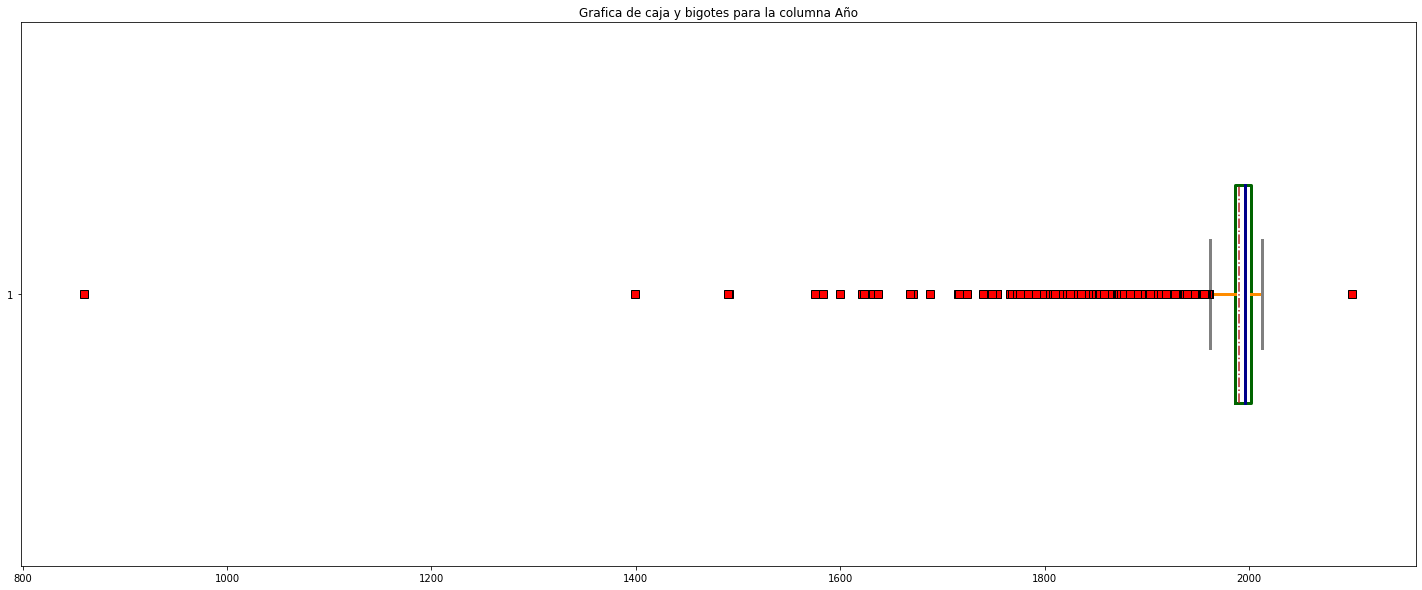

In [411]:
def cajaBigotes(columna):
#Estilos y colores
  flierpropsStyle = dict(marker='s', markerfacecolor='r', markersize=8, markeredgecolor='black') #estilo para los datos atipicos
  meanspropsStyle = dict(linestyle='-.', linewidth=1.5, color='firebrick') #estilo media
  medianpropsStyle = dict(linestyle='-', linewidth=3, color='DarkBlue') #estilo mediana
  boxpropsStyle = dict(linestyle='-', linewidth=3, color='DarkGreen') #estilo caja
  whiskerpropsStyle = dict(linestyle='-', linewidth=3, color='DarkOrange') #estilo bigotes
  cappropsStyle = dict(linestyle='-', linewidth=3, color='Gray') #estilo de las caps

#Creacion de grafica
  fig1, ax1 = plt.subplots(figsize = (25,10))
  ax1.set_title('Grafica de caja y bigotes para la columna '+columna)
  ax1.boxplot(df_Meteoritos[columna], vert=False, widths=0.4,meanline=True, showmeans=True,boxprops=boxpropsStyle, flierprops=flierpropsStyle, meanprops=meanspropsStyle, medianprops=medianpropsStyle, whiskerprops=whiskerpropsStyle, capprops=cappropsStyle)
  return ax1;
cajaBigotes('Año') 
fig1.show() 

Hemos creado una funcion definida llamada ***cajabigotes*** de manera que solo con pasarle el nombre de la columna nos crea una grafica de caja bigotes, igual y con la misma personalizacion que esta primera. Esto nos ahorrara tener que copiar y pegar codigo.

Vamos a imprimir los datos estadisticos que conforman este grafico:


*   Total de datos
*   Media
*   Desviacion tipica (std). Indica la dispersion de los datos cuanto mayor sea.
*   Percentil 0% o el dato minimo.
*   1º Cuartil Q1 o Percentil 25% (Valor concreto, que es mayor que el 25% de datos pero le supera el 75% restante.).
*   2º Cuartil Q2 o Percentil 50% == Mediana. (Valor concreto, que es mayor que el 50% de datos pero le supera el 50% restante.)
*   3º Cuartil Q3 o Percentil 75% (Valor concreto, que es mayor que el 75% de datos pero le supera el 25% restante.)
*   Percentil 100% o el dato maximo.


In [412]:
df_Meteoritos['Año'].describe()

count    38115.000000
mean      1989.993913
std         25.469892
min        860.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: Año, dtype: float64

Y con esto calcularemos los [valores atipicos leves](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico), que son correpondientes a los limites de los bigotes. Para ello primero necesitamos el [rango intercuartil](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico) que es la diferencia entre el tercer y el primer cuartil de una distribución y se denota por ***IQR***.

> ***IQR*** = ***Q3*** - ***Q1*** = 2002 - 1986 = 16

Ahora calcularemos los valores atipicos leves los denotaremos ***f1*** para el inferior y ***f3*** para el superior.

> ***Q1*** - 1.5 * ***IQR*** = 1986 - 1.5 * 16 = 1962

Si 1962 existe sera ***f1***, sino buscaremos el valor superior a 1962 más cercano y ese sera ***f1***.

In [413]:
1962 in df_Meteoritos.Año.values #Comprueba si el valor 1962 se encuentra en la columna Año, devuelve True si, sí.

True

Como si existe 1962 entonces este sera ***f1***. Todo lo que sea mayor sera un valor tipico y todo lo que sea menor sera atipico.



> ***f1*** = 1962



Ahora buscaremos ***f3***:

> ***Q3*** + 1.5 * ***IQR*** = 2002 + 1.5 * 16 = 2026

Buscaremos si este valor existe y si es asi sera ***f3*** sino buscaremos el valor inferior a 2026 más cercano y ese sera ***f3***.

In [414]:
2026 in df_Meteoritos.Año.values

False

Como no existe buscamos los menores de 2026.

In [415]:
df_Meteoritos[df_Meteoritos['Año']<=2026].sort_values(['Año'])

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Año,latitud,longitud,Coordenadas
704,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725, 130.75)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30781,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30780,Northwest Africa 7862,57426,Valid,L4/5,317.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30777,Northwest Africa 7858,57423,Valid,H4,459.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"


2013 es el año mas cercano.

> ***f3*** = 2013

Ahora marcare estos datos en al grafica anterior para que se entienda. 
***IQR*** lo represenatre con una area rosa entre los ods bigotes.


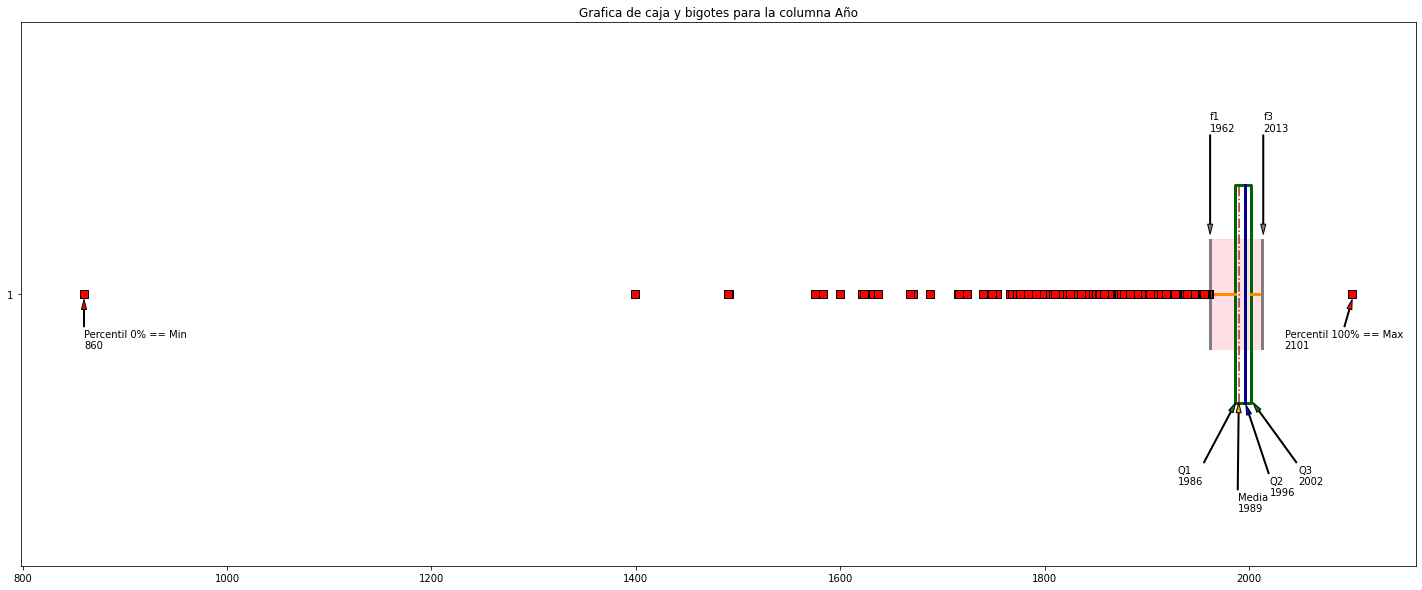

In [416]:
ax1=cajaBigotes('Año')
#Añadir texto con flecha
  #Añadir Q1
ax1.annotate('Q1\n1986', xy=(1987,0.80), xytext=(1930,0.65), arrowprops=dict(facecolor='Green', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir Q2
ax1.annotate('Q2\n1996', xy=(1997,0.7960), xytext=(2020,0.630), arrowprops=dict(facecolor='blue', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir Q3
ax1.annotate('Q3\n2002', xy=(2004,0.80), xytext=(2048,0.65), arrowprops=dict(facecolor='Green', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir Media
ax1.annotate('Media\n1989', xy=(1990,0.80), xytext=(1989,0.60), arrowprops=dict(facecolor='Orange', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir Min
ax1.annotate('Percentil 0% == Min\n860', xy=(860,0.99), xytext=(860,0.90), arrowprops=dict(facecolor='Red', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir Max
ax1.annotate('Percentil 100% == Max\n2101', xy=(2101,0.99), xytext=(2035,0.90), arrowprops=dict(facecolor='Red', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir f1
ax1.annotate('f1\n1962', xy=(1962,1.11), xytext=(1962,1.3), arrowprops=dict(facecolor='Gray', shrink=1, width=1, headwidth=5, headlength=10))
  #Añadir f3
ax1.annotate('f3\n2013', xy=(2014,1.11), xytext=(2014,1.3), arrowprops=dict(facecolor='Gray', shrink=1, width=1, headwidth=5, headlength=10))

#Añadir area coloreada IQR
x = list(range(1962,2014,1)) #Creo un lista de valores desde f1 a f3
x = np.array(x) #convieto la lista a array
y = [1.102 for i in x] #Creo una recta desde f1 a f3 en la parte superior
z = [0.899 for i in x] #Creo una recta desde f1 a f3 en la parte inferior
ax1.fill_between(x, y, z, color='Pink', alpha=0.5) #Relleno el espacio de rosa

fig1.show()

Tras explicar lo que queremos conseguir con la grafica de caja y bigotes, pasamos a discernir que hacer con los datos atipicos.

Aunque haya datos atipicos, no nos merece la pena eliminarlos, pues esta columna se omitiria en el caso de que se haga algun modelo predictivo con estos datos sobre este dataset. ¿Por qué? Porque el año no sugiere ningun otro dato, no porque haya caido despues del 1900 va a ser mas grande o con mas con mas hierro en su composicion. En todo casos utilizaria para un modelo de clustering con el que encontrar patrones oculto o agrupaciones. Por ejemplo: Entre el 1900 y 2000 la densidad de meteoritos de clase L2 fue mayor. Con esto se podria investigar a que se debe ese aumento... A lo mejor es solo que los sistemas de deteccion han mejorado, o que verdaderamente por una causa desconocida en ese periodo cayeron más meteoritos de ese tipo.

Lo que si vamos a quitar son las filas con años mayores a la actualidad. Veamos cuale son:

In [425]:
df_Meteoritos[df_Meteoritos['Año']>datetime.today().year].sort_values(['Año'])

,Nombre,ID,Estado del meteorito,Clase del meteorito,Masa(g),Observado,Año,latitud,longitud,Coordenadas
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.0,0.0,"(0.0, 0.0)"


Solo hay una fila por lo que borramos.

In [426]:
df_Meteoritos.drop(df_Meteoritos.index[df_Meteoritos['Año'] == 2101], inplace = True)

In [428]:
2101 in df_Meteoritos.Año.values

False

Ya hemos eliminado el único dato atipico que logicamente hemos considerado prescindible.

## ***BIBLIOGRAFIA***

Dataset Meteorite Landings: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh 

Para cambiar fecha de tipo string a datetime: https://www.journaldev.com/23365/python-string-to-datetime-strptime 

Tipos de datos de numpy: https://numpy.org/doc/stable/reference/arrays.scalars.html#integer-types

Modificar colores de grafica caja y bigotes: https://matplotlib.org/stable/gallery/statistics/boxplot.html

Agrgar anotaciones y lineas y flechas a garficas: https://youtu.be/0ZXv8gyjmws?t=850

Opciones de anotacion de flecha en gafica: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.annotate.html

Ordenamiento de impresion de DataFrames: https://www.analyticslane.com/2019/04/29/diferentes-formas-de-ordenar-dataframes-en-pandas/